In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.04, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y==cl, 1], alpha = 0.8, cmap = cmap(idx), marker = markers[idx], label = cl)

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data[:,[2,3]]
y= iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [10]:
df_wine = pd.read_csv('Https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'NonFlavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# print(df_wine['Class label'].unique())

[1 2 3]


In [11]:
from sklearn.cross_validation import train_test_split
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(penalty = 'l1', C = 0.1)
lr.fit(x_train_std, y_train)
print("Training Accuracy ", lr.score(x_train_std, y_train))
print("Test Accuracy ", lr.score(x_test_std, y_test))
print(lr.intercept_)
print(lr.coef_)

Training Accuracy  0.9838709677419355
Test Accuracy  0.9814814814814815
[-0.38377581 -0.15808992 -0.70041945]
[[ 0.27999209  0.          0.         -0.02801297  0.          0.
   0.70990326  0.          0.          0.          0.          0.
   1.23640906]
 [-0.64394534 -0.06880567 -0.0571918   0.          0.          0.
   0.          0.          0.         -0.92682917  0.06016684  0.
  -0.37105149]
 [ 0.          0.0614932   0.          0.          0.          0.
  -0.63606551  0.          0.          0.49812211 -0.35825074 -0.57118576
   0.        ]]


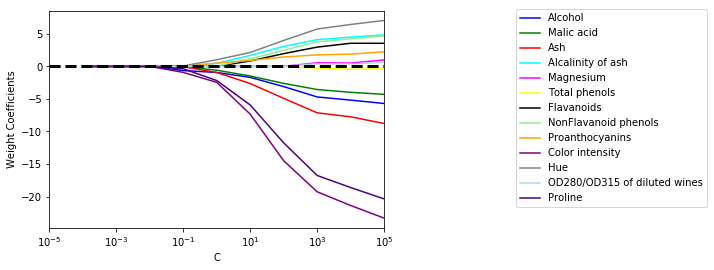

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
color = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'lightgreen', 'orange', 'purple', 'gray', 'lightblue', 'indigo']
weights, params = [], []
for c in range(-4,6):
    lr = LogisticRegression(penalty='l1', C = 10**c)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, clr in zip(range(x_train_std.shape[1]), color):
    plt.plot(params, weights[:, column], label = df_wine.columns[column+1], color = clr)
plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.ylabel('Weight Coefficients')
plt.xscale('log')
plt.legend(loc = 'best', bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)
plt.show()